In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Load the Dataset

### Load Training Data

In [2]:
dftn=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
dftn.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Load Testing Data

In [3]:
dftt=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
dftt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Count Rows and Columns of each Dataframe 

In [4]:
dftn.shape,dftt.shape

((1460, 81), (1459, 80))

### Combine datasets

In [5]:
dftn['ind'] = 'train'
dftt['ind'] = 'test'
dftt['SalePrice'] = np.nan
df = pd.concat([dftn, dftt], ignore_index=True)

## Cleaning the datasets

### Now get the info. on data types, missing values, features etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Let's deal with missing values.

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("None") 
    else:
        df[col] = df[col].fillna(df[col].mean()) 

### Let's get the info. again

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### This section provides an analysis of sales trends over different years, categorized by sale types and conditions, offering valuable insights into market patterns.

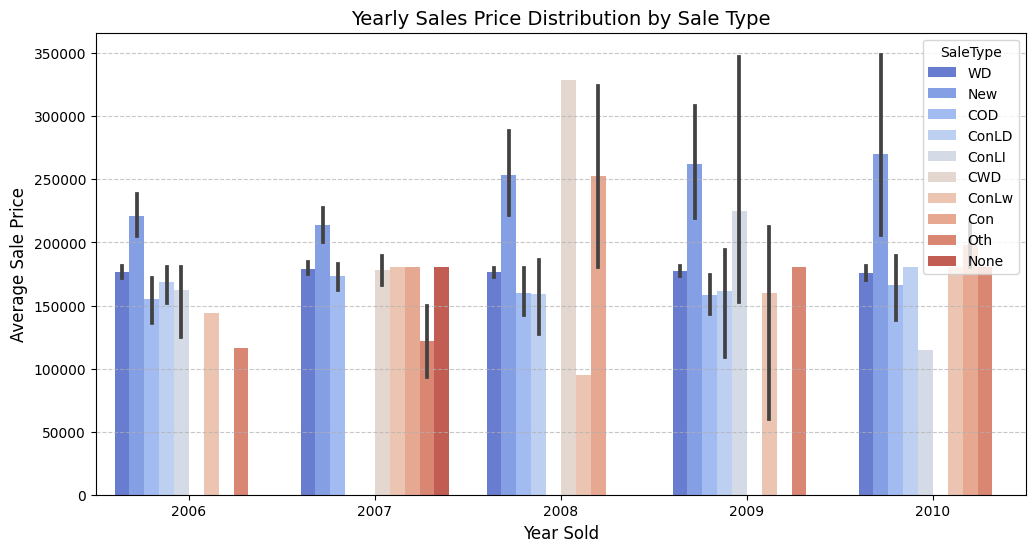

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create the bar plot with a cooler palette
sns.barplot(data=df, x='YrSold', y='SalePrice', hue='SaleType', palette='coolwarm')

plt.xlabel("Year Sold", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.title("Yearly Sales Price Distribution by Sale Type", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


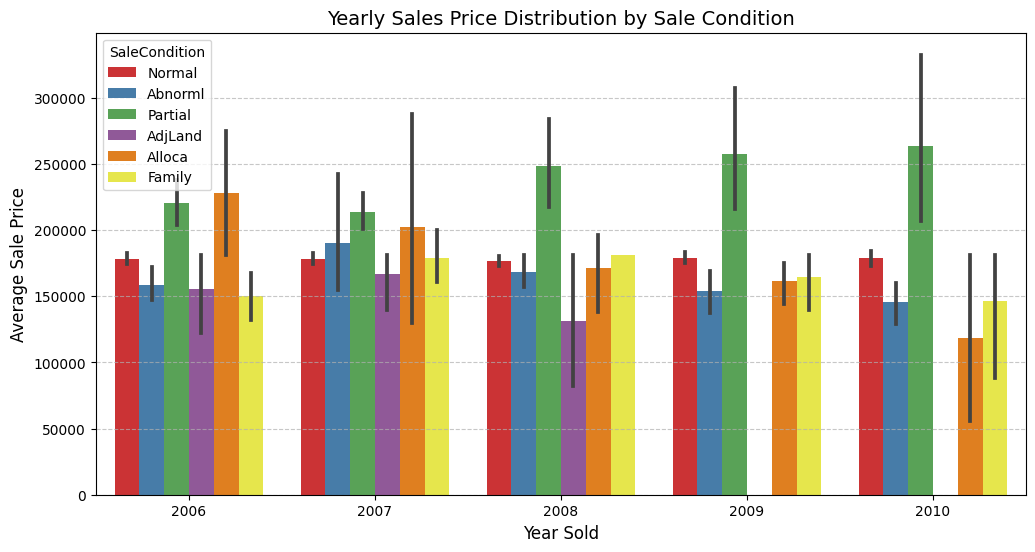

In [10]:
plt.figure(figsize=(12, 6))

# Create the bar plot with a cooler palette
sns.barplot(data=df, x='YrSold', y='SalePrice', hue='SaleCondition', palette='Set1')

# Add labels and title
plt.xlabel("Year Sold", fontsize=12)
plt.ylabel("Average Sale Price", fontsize=12)
plt.title("Yearly Sales Price Distribution by Sale Condition", fontsize=14)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Feature Engineering

In [11]:
df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
df["TotalBath"] = df["FullBath"] + 0.5 * df["HalfBath"] + df["BsmtFullBath"] + 0.5 * df["BsmtHalfBath"]
df["Age"] = df["YrSold"] - df["YearBuilt"]
df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]
df["IsRemodeled"] = (df["YearBuilt"] != df["YearRemodAdd"]).astype(int)
df["IsNew"] = (df["YearBuilt"] == df["YrSold"]).astype(int)
df["HasPool"] = df["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
df["HasGarage"] = df["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
df["HasBsmt"] = df["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
df["HasFireplace"] = df["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)
df["LogLotArea"] = np.log1p(df["LotArea"])
df["LogGrLivArea"] = np.log1p(df["GrLivArea"])
df["LogTotalSF"] = np.log1p(df["TotalSF"])

## Building the Predictive model

#### Drop irrelavent feature 

In [12]:
df=df.drop("Id",axis=1)

#### Encode the objects

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Or median
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

#### Split the model for training and testing

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Split raw train/test based on 'ind' column
train = df[df["ind"] == 1].copy() if df["ind"].dtype != 'object' else df[df["ind"] == "train"].copy()
test = df[df["ind"] == 0].copy() if df["ind"].dtype != 'object' else df[df["ind"] == "test"].copy()

train.drop("ind", axis=1, inplace=True)
test.drop("ind", axis=1, inplace=True)

# Target and features
y = np.log(train["SalePrice"])  # log transform
X = train.drop("SalePrice", axis=1)
X_test = test.drop("SalePrice", axis=1, errors='ignore')  # in case it exists

# Identify column types
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing pipelines
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# Combine transformers
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

# Fit & transform
X_scaled = preprocessor.fit_transform(X)
X_test_scaled = preprocessor.transform(X_test)

# Split into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, train_size=0.7, test_size=0.3, random_state=0
)

print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")


X_train shape: (1021, 316)
X_valid shape: (438, 316)
y_train shape: (1021,)
y_valid shape: (438,)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Now import libraries, fit the model, and get the prediction.

#### XGBoost

In [15]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Required to avoid warning
    random_state=0,
    n_jobs=-1,
    verbosity=0
)

param_dist = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,  # Reduce or increase for faster/slower tuning
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_
print("Best XGBRegressor:", best_regressor)

y_pred = best_regressor.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f"Validation RMSE: {rmse:.4f}")


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best XGBRegressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)
Validation RMSE: 0.1181


#### CatBoost

In [16]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(verbose=0, random_seed=0)
cat_model.fit(X_train, y_train)

cat_pred = cat_model.predict(X_valid)
cat_rmse = mean_squared_error(y_valid, cat_pred, squared=False)
print(f"CatBoost RMSE: {cat_rmse:.4f}")

CatBoost RMSE: 0.1215


#### Submission File with better RMSE

In [17]:
# Predict on test set with best XGBoost model
test_preds_log = best_regressor.predict(X_test_scaled)
test_preds = np.expm1(test_preds_log)  # Inverse of log1p()

# Get test IDs
test_ids = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')['Id']

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_preds
})

# Save the submission
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
